In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [92]:
np.random.seed(0)

In [93]:
dogs_whisker_length = np.random.normal(loc=5, scale=4, size=20)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=4, size=20)

In [94]:
cats_whisker_length = np.random.normal(loc=8, scale=4, size=20)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=4, size=20)

In [95]:
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))

In [96]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

In [98]:
X_test

array([[ 1.58361704,  6.790789  ],
       [10.97631629, 12.92116272],
       [ 6.33469731,  8.62539588],
       [ 2.98881856, -1.52079339]])

In [99]:
X_train

array([[12.47023196, 17.0790185 ],
       [ 8.0441509 ,  4.44885701],
       [ 9.20988759,  2.68460134],
       [11.10996142,  6.85112902],
       [ 6.54903534,  5.22466137],
       [ 8.80035367,  8.18303407],
       [ 6.24770279,  3.39287626],
       [ 6.64239401, 13.87743508],
       [ 5.48670007,  0.07681413],
       [ 9.54760999,  5.51593164],
       [ 7.88727109,  6.60936656],
       [ 4.58712459, 14.13111686],
       [ 4.17936694, 12.8095194 ],
       [ 5.96139127,  5.70970457],
       [12.05620938, -2.21195926],
       [ 3.27747126,  0.06069672],
       [ 1.09088848,  2.1825373 ],
       [10.81709403,  9.51265008],
       [ 6.60062883, 10.61447438],
       [ 7.14903888,  5.20778158],
       [ 2.31992825,  3.56178735],
       [ 8.91495194, 11.4577448 ],
       [ 4.41813376,  7.91636225],
       [ 8.26606889,  1.5168114 ],
       [13.9635728 ,  5.03133992],
       [ 9.71332748,  2.26075964],
       [15.80310158, -1.90513041],
       [ 5.95677945,  9.55760274],
       [ 5.57617428,

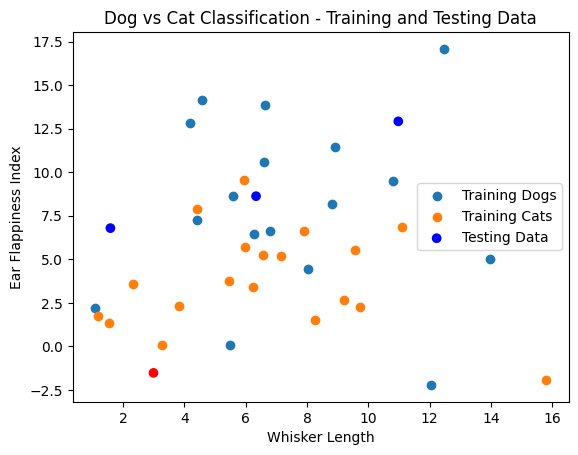

In [100]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Training Dogs')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Training Cats')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', label='Testing Data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Training and Testing Data')
plt.legend()
plt.show()

In [101]:
def random_linear_classifier(data_dogs, data_cats, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    
    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        
        error = compute_error(data_dogs, data_cats, theta, theta0)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return best_theta, best_theta0, best_error

def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error

In [102]:
def cross_validate(data_dogs, data_cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            X_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(X_train_fold[y_train_fold == 0], 
                                                                                 X_train_fold[y_train_fold == 1], 
                                                                                 k, d)
            errors.append(compute_error(X_val_fold[y_val_fold == 0], X_val_fold[y_val_fold == 1], 
                                         best_theta_fold, best_theta0_fold))

        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k


k_values = [1, 50, 500, 1000]

best_k = cross_validate(dogs_data, cats_data, k_values, d=2)

print(f"Best value of k: {best_k}")


Best value of k: 1000


In [103]:
k=best_k
d = 2  
best_theta_train, best_theta0_train, train_error = random_linear_classifier(X_train[y_train == 0], X_train[y_train == 1], k, d)


In [104]:
x_vals_train = np.linspace(-5, 15, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1]) * x_vals_train - (best_theta0_train / best_theta_train[1])


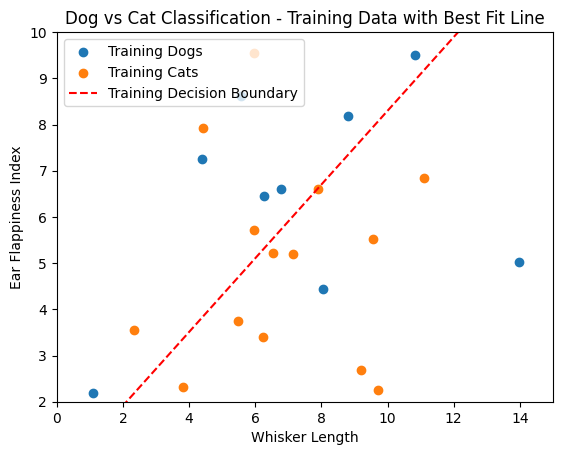

In [105]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Training Dogs')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Training Cats')
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='Training Decision Boundary')

plt.xlim([0, 15])
plt.ylim([2, 10])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Training Data with Best Fit Line')
plt.legend()
plt.show()